In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
df = pd.read_csv("country_wise_latest.csv")

# Show top 5 rows
df.head()


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [4]:
# Check structure
df.info()

# Rename columns if needed (remove spaces)
df.columns = [col.strip().replace(" ", "_") for col in df.columns]

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New_cases                 0
New_deaths                0
New_recovered             0
Deaths_/_100_Cases        0
Recovered_/_100_Cases     0
Deaths_/_100_Recovered    0
Confirmed_last_week       0
1_week_change             0
1_week_%_increase         0
WHO_Region                0
dtype: int64

C:\Users\KIIT\AppData\Local\Temp\ipykernel_11508\3973697587.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Confirmed', y='Country/Region', data=top10, palette='Reds_r')


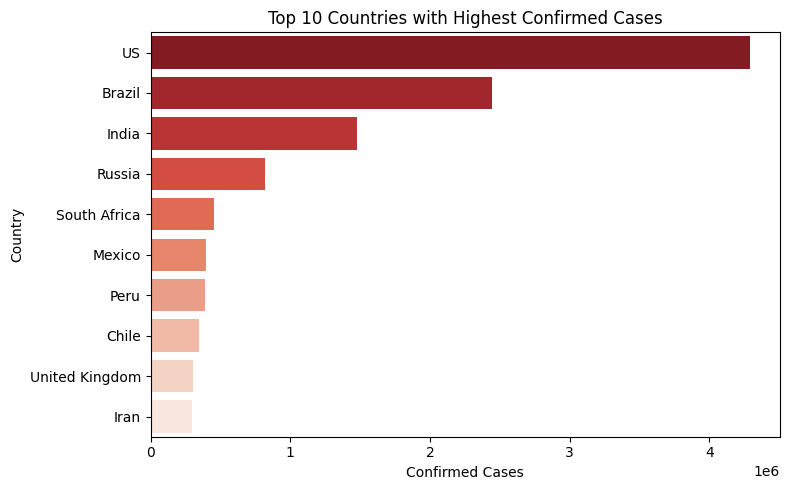

In [6]:
top10 = df.sort_values(by='Confirmed', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x='Confirmed', y='Country/Region', data=top10, palette='Reds_r')
plt.title("Top 10 Countries with Highest Confirmed Cases")
plt.xlabel("Confirmed Cases")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


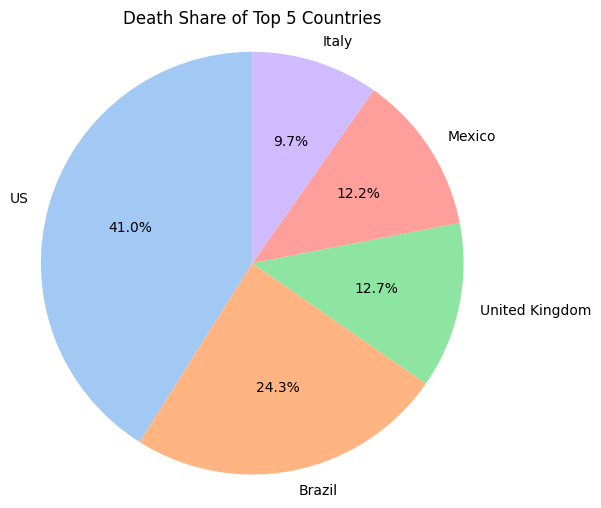

In [8]:
top5_deaths = df.sort_values(by='Deaths', ascending=False).head(5)

plt.figure(figsize=(6,6))
plt.pie(top5_deaths['Deaths'], labels=top5_deaths['Country/Region'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Death Share of Top 5 Countries")
plt.axis('equal')
plt.show()


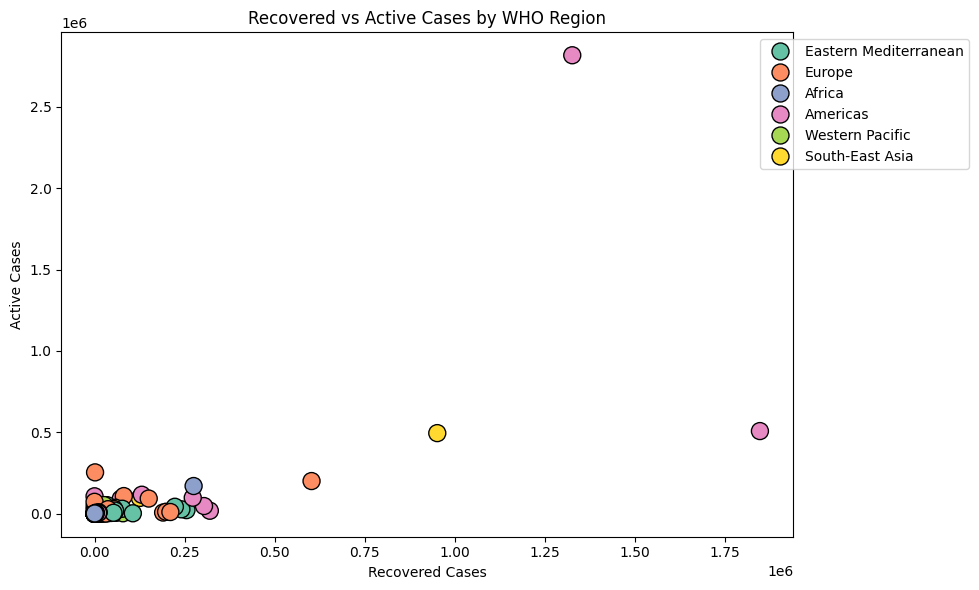

In [18]:
plt.figure(figsize=(10,6))  # Bigger figure size
sns.scatterplot(
    x='Recovered', 
    y='Active', 
    data=df, 
    hue='WHO_Region', 
    palette='Set2', 
    s=150,               # 🔸 Increase point size here (default is ~40)
    edgecolor='black'    # Optional: adds outline for clarity
)
plt.title("Recovered vs Active Cases by WHO Region")
plt.xlabel("Recovered Cases")
plt.ylabel("Active Cases")
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))  # Adjust legend position
plt.tight_layout()
plt.show()


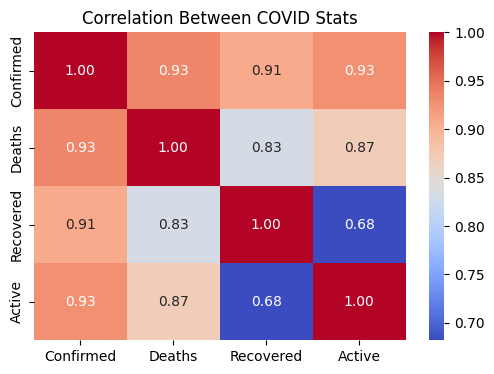

In [12]:
numeric = df[['Confirmed', 'Deaths', 'Recovered', 'Active']]
plt.figure(figsize=(6,4))
sns.heatmap(numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between COVID Stats")
plt.show()


C:\Users\KIIT\AppData\Local\Temp\ipykernel_11508\295128598.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_total.index, y=region_total.values, palette='Set3')


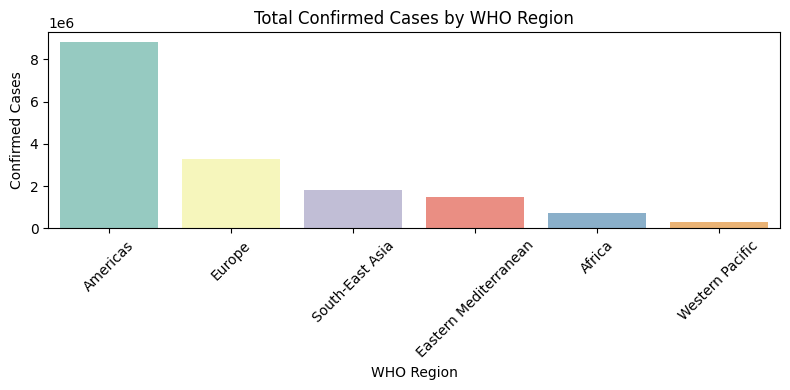

In [14]:
region_total = df.groupby('WHO_Region')['Confirmed'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=region_total.index, y=region_total.values, palette='Set3')
plt.title("Total Confirmed Cases by WHO Region")
plt.xlabel("WHO Region")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\KIIT\AppData\Local\Temp\ipykernel_11508\1021970893.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Confirmed', y='Country/Region', data=top10, palette='Reds_r')


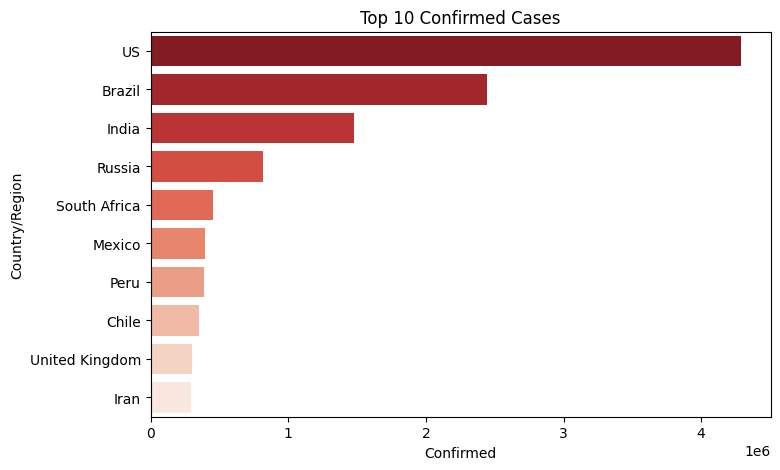

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(x='Confirmed', y='Country/Region', data=top10, palette='Reds_r')
plt.title("Top 10 Confirmed Cases")
plt.savefig("top10_confirmed_bar.png")
